In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Read txt file

In [4]:
# Change the current working folder to the project folder
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/Java/docs')
print(os.getcwd())

C:\Users\Cheng\Documents\Proj\VarianceArithemtic
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs


In [5]:
df = pd.read_csv("../output/FFTVar.txt", sep='\t')
df.head()

RealType NoiseType  Noise  Signal  Order  Freq       Test  UncertaintyMean  \
0      Var  Gaussian    0.0  Linear      4     0    Forward     4.027000e-15   
1      Var  Gaussian    0.0  Linear      4     0    Reverse     6.795000e-16   
2      Var  Gaussian    0.0  Linear      4     0  Roundtrip     1.249000e-15   
3      Var     White    0.0  Linear      4     0    Forward     4.027000e-15   
4      Var     White    0.0  Linear      4     0    Reverse     6.795000e-16   

   UncertaintyDev  UncertaintyMin  ...     1.2  1.4     1.6  1.8  2.0     2.2  \
0    2.439000e-15    0.000000e+00  ...  0.0690  0.0  0.0345  0.0  0.0  0.0345   
1    1.581000e-16    4.318000e-16  ...  0.0000  0.0  0.0000  0.0  0.0  0.0000   
2    2.457000e-16    9.823000e-16  ...  0.0625  0.0  0.0000  0.0  0.0  0.0000   
3    2.439000e-15    0.000000e+00  ...  0.0690  0.0  0.0345  0.0  0.0  0.0345   
4    1.581000e-16    4.318000e-16  ...  0.0000  0.0  0.0000  0.0  0.0  0.0000   

     2.4  2.6  2.8  3.0  
0  0.000  0.0  0.0  0.0  
1  0.143  0.0  0.0  0.0  
2  0.000  0.0  0.0  0.0  
3  0.000  0.0  0.0  0.0  
4  0.143  0.0  0.0  0.0  

[5 rows x 46 columns]

In [5]:
df.dtypes

RealType            object
NoiseType           object
Noise              float64
Signal              object
Order                int64
Freq                 int64
Test                object
UncertaintyMean    float64
UncertaintyDev     float64
UncertaintyMin     float64
UncertaintyMax     float64
ErrorMean          float64
ErrorDev           float64
ErrorMin           float64
ErrorMax           float64
-3.0               float64
-2.8               float64
-2.6               float64
-2.4               float64
-2.2               float64
-2.0               float64
-1.8               float64
-1.6               float64
-1.4               float64
-1.2               float64
-1.0               float64
-0.8               float64
-0.6               float64
-0.4               float64
-0.2               float64
0.0                float64
0.2                float64
0.4                float64
0.6                float64
0.8                float64
1.0                float64
1.2                float64
1

In [6]:
df.count()

RealType           27540
NoiseType          27540
Noise              27540
Signal             27540
Order              27540
Freq               27540
Test               27540
UncertaintyMean    27540
UncertaintyDev     27540
UncertaintyMin     27540
UncertaintyMax     27540
ErrorMean          27540
ErrorDev           27540
ErrorMin           27540
ErrorMax           27540
-3.0               27540
-2.8               27540
-2.6               27540
-2.4               27540
-2.2               27540
-2.0               27540
-1.8               27540
-1.6               27540
-1.4               27540
-1.2               27540
-1.0               27540
-0.8               27540
-0.6               27540
-0.4               27540
-0.2               27540
0.0                27540
0.2                27540
0.4                27540
0.6                27540
0.8                27540
1.0                27540
1.2                27540
1.4                27540
1.6                27540
1.8                27540


# Export to Excel

## Plot Order vs Noise

In [7]:
def ExportHistogram(signal, test, noiseType, freq=0):
    with open(f'../Output/FFT_Noise_vs_Order_{signal}{freq}_{test}_{noiseType}.txt', 'w', newline='\n') as f:
        for value in ['UncertaintyMean', 'ErrorDev', 'ErrorMax']:
            signalName = 'Sin/Cos' if signal == 'Aggr' else signal
            if freq == 0:
                f.write(f'{signalName}\t{test}\t{noiseType}\t{value}\n')
            else:
                f.write(f'{signalName}\t{freq}\t{test}\t{noiseType}\t{value}\n')
            dfOrderVsNoise = df[(df['Noise']!=0) & (df['NoiseType']==noiseType) & 
                                (df['Signal']==signal) & (df['Test']==test) & (df['Freq']==freq)]\
                [['Noise', 'Order', value]].set_index('Noise')\
                .pivot(columns='Order', values=value)
            dfOrderVsNoise.to_csv(f, sep='\t')
            f.write('\n')
    return dfOrderVsNoise

In [8]:
ExportHistogram('Aggr', 'Forward', 'Gaussian').head()

Order            4      5      6      7      8      9      10     11     12  \
Noise                                                                         
1.000000e-16  2.915  2.810  3.086  3.074  3.084  3.073  3.092  3.096  3.098   
1.000000e-15  2.794  2.840  3.081  3.048  3.060  3.075  3.088  3.088  3.098   
1.000000e-14  2.725  2.732  2.851  2.933  3.028  3.098  3.098  3.099  3.095   
1.000000e-13  2.445  2.910  3.037  3.076  3.085  3.088  3.097  3.091  3.097   
1.000000e-12  2.466  2.932  3.048  3.036  3.069  3.095  3.079  3.100  3.100   

Order            13     14   15   16   17   18  
Noise                                           
1.000000e-16  3.099  3.097  3.1  3.1  3.1  3.1  
1.000000e-15  3.096  3.099  3.1  3.1  3.1  3.1  
1.000000e-14  3.095  3.100  3.1  3.1  3.1  3.1  
1.000000e-13  3.097  3.099  3.1  3.1  3.1  3.1  
1.000000e-12  3.099  3.098  3.1  3.1  3.1  3.1

In [9]:
ExportHistogram('Linear', 'Forward', 'Gaussian').head()

Order            4      5      6      7      8      9      10     11     12  \
Noise                                                                         
1.000000e-16  2.947  2.891  2.095  2.626  2.817  3.081  3.087  2.939  3.026   
1.000000e-15  2.007  2.794  2.988  2.621  2.803  3.080  3.085  2.939  3.026   
1.000000e-14  2.483  2.981  2.735  3.028  2.780  3.025  2.979  2.935  3.025   
1.000000e-13  2.451  2.210  2.751  2.635  2.687  2.973  3.002  3.030  3.059   
1.000000e-12  2.176  2.416  2.571  2.914  2.798  2.945  3.095  3.063  3.026   

Order            13     14     15     16     17     18  
Noise                                                   
1.000000e-16  3.052  3.098  3.089  3.097  3.098  3.099  
1.000000e-15  3.052  3.098  3.089  3.097  3.098  3.099  
1.000000e-14  3.051  3.097  3.089  3.097  3.098  3.099  
1.000000e-13  3.088  3.078  3.086  3.098  3.097  3.099  
1.000000e-12  3.080  3.092  3.096  3.098  3.095  3.100

In [10]:
ExportHistogram('Aggr', 'Reverse', 'Gaussian').head()

Order            4      5      6      7      8      9      10     11     12  \
Noise                                                                         
1.000000e-16  2.081  2.320  2.850  2.795  2.949  2.648  3.080  3.090  3.088   
1.000000e-15  2.692  2.952  2.900  2.943  3.070  3.095  3.089  3.080  3.095   
1.000000e-14  3.086  2.903  3.058  3.065  3.083  3.066  3.095  3.094  3.094   
1.000000e-13  2.776  2.950  2.991  2.974  3.077  3.099  3.089  3.091  3.097   
1.000000e-12  2.516  2.976  3.084  2.988  3.029  3.090  3.098  3.095  3.098   

Order            13     14     15     16   17   18  
Noise                                               
1.000000e-16  3.100  3.099  3.100  3.099  3.1  3.1  
1.000000e-15  3.099  3.098  3.100  3.100  3.1  3.1  
1.000000e-14  3.100  3.099  3.099  3.100  3.1  3.1  
1.000000e-13  3.100  3.100  3.100  3.100  3.1  3.1  
1.000000e-12  3.100  3.099  3.100  3.100  3.1  3.1

In [11]:
ExportHistogram('Linear', 'Reverse', 'Gaussian').head()

Order             4      5      6      7      8      9      10     11     12  \
Noise                                                                          
1.000000e-16  0.8821  1.414  3.041  3.072  3.046  0.000  2.925  1.409  2.839   
1.000000e-15  1.1960  1.583  3.036  3.071  3.046  0.000  2.925  1.409  2.839   
1.000000e-14  2.4480  2.578  2.959  3.017  3.039  0.000  2.925  1.409  2.839   
1.000000e-13  1.6340  2.810  2.523  2.973  3.095  1.933  3.022  2.380  2.839   
1.000000e-12  2.2130  2.331  2.136  2.969  3.079  2.951  2.628  1.978  2.826   

Order            13     14     15     16     17     18  
Noise                                                   
1.000000e-16  2.925  2.129  3.021  3.045  2.094  3.044  
1.000000e-15  2.925  2.129  3.021  3.045  2.094  3.044  
1.000000e-14  2.925  2.129  3.021  3.045  2.094  3.044  
1.000000e-13  2.925  2.129  3.021  3.045  2.094  3.044  
1.000000e-12  2.924  2.089  2.831  2.789  2.094  3.044

In [12]:
ExportHistogram('Aggr', 'Roundtrip', 'Gaussian').head()

Order               4         5         6         7         8         9   \
Noise                                                                      
1.000000e-16  2.393000  2.478000  3.002000  2.985000  2.948000  2.930000   
1.000000e-15  0.441700  0.551100  0.551500  0.551700  0.661100  0.770600   
1.000000e-14  0.033300  0.044410  0.044410  0.066610  0.066610  0.088810   
1.000000e-13  0.004441  0.004866  0.005551  0.006661  0.007772  0.007772   
1.000000e-12  0.000333  0.000444  0.000555  0.000666  0.000666  0.000666   

Order               10        11        12       13       14        15  \
Noise                                                                    
1.000000e-16  3.095000  3.100000  3.100000  3.10000  3.10000  3.100000   
1.000000e-15  0.879100  0.989400  0.988700  1.20700  1.20600  1.206000   
1.000000e-14  0.088810  0.088810  0.099910  0.09991  0.12210  0.122100   
1.000000e-13  0.008882  0.011100  0.009992  0.01110  0.01221  0.012210   
1.000000e-12  0.000888  0.000888  0.000999  0.00111  0.00111  0.001332   

Order               16        17        18  
Noise                                       
1.000000e-16  3.099000  3.100000  3.100000  
1.000000e-15  1.315000  1.205000  1.314000  
1.000000e-14  0.122100  0.133200  0.144300  
1.000000e-13  0.012210  0.013320  0.013320  
1.000000e-12  0.001332  0.001221  0.001332

In [13]:
ExportHistogram('Linear', 'Roundtrip', 'Gaussian').head()

Order              4         5        6        7        8       9       10  \
Noise                                                                        
1.000000e-16  1.31000  1.788000  1.94200  2.08500  2.22800  2.8330  2.9320   
1.000000e-15  1.05600  1.964000  2.45800  2.07900  2.22700  2.8320  2.9320   
1.000000e-14  0.22000  0.679500  1.04600  2.30200  2.31700  3.0180  2.9090   
1.000000e-13  0.01776  0.035510  0.14180  0.28160  0.75070  1.4610  2.2990   
1.000000e-12  0.00222  0.005329  0.01421  0.04973  0.04972  0.1702  0.3666   

Order             11     12     13     14     15     16     17     18  
Noise                                                                  
1.000000e-16  3.0220  2.897  3.042  3.097  3.039  2.970  3.069  3.096  
1.000000e-15  3.0220  2.897  3.042  3.097  3.039  2.970  3.069  3.096  
1.000000e-14  3.0200  2.897  3.042  3.097  3.039  2.970  3.069  3.096  
1.000000e-13  3.0370  3.076  3.020  3.035  3.038  2.970  3.069  3.096  
1.000000e-12  0.8523  1.790  2.719  3.045  2.969  3.089  3.064  3.099

## vs Order

In [14]:
def ExportVsOrder(noise, signal, freq=0):
    dfOrder = df[(df['Signal']==signal) & (df['Noise']==noise)].sort_values(by=['Test', 'NoiseType', 'Order'])
    dfOrder.to_csv(f'../Output/FFT_Order_{signal}{freq}_{noise:.0e}.txt', sep='\t')
    return dfOrder

In [15]:
ExportVsOrder(0, 'Aggr').head()

RealType NoiseType  Noise Signal  Order  Freq     Test  UncertaintyMean  \
1734      Var  Gaussian    0.0   Aggr      4     0  Forward     2.948000e-16   
3570      Var  Gaussian    0.0   Aggr      5     0  Forward     4.248000e-16   
5406      Var  Gaussian    0.0   Aggr      6     0  Forward     6.034000e-16   
7242      Var  Gaussian    0.0   Aggr      7     0  Forward     8.586000e-16   
9078      Var  Gaussian    0.0   Aggr      8     0  Forward     1.221000e-15   

      UncertaintyDev  UncertaintyMin  ...     1.2      1.4      1.6      1.8  \
1734    1.598000e-16             0.0  ...  0.0420  0.00840  0.00840  0.00000   
3570    2.261000e-16             0.0  ...  0.0444  0.00806  0.00202  0.00000   
5406    3.498000e-16             0.0  ...  0.0164  0.01090  0.00546  0.00149   
7242    5.374000e-16             0.0  ...  0.0141  0.01230  0.00321  0.00370   
9078    8.215000e-16             0.0  ...  0.0120  0.01040  0.00417  0.00454   

          2.0      2.2      2.4       2.6       2.8  3.0  
1734  0.00000  0.00000  0.00000  0.000000  0.000000  0.0  
3570  0.00000  0.00000  0.00000  0.000000  0.000000  0.0  
5406  0.00149  0.00198  0.00397  0.000000  0.000000  0.0  
7242  0.00197  0.00321  0.00173  0.000987  0.001480  0.0  
9078  0.00086  0.00442  0.00086  0.001110  0.000982  0.0  

[5 rows x 46 columns]

In [16]:
ExportVsOrder(1e-16, 'Aggr').head()

RealType NoiseType         Noise Signal  Order  Freq     Test  \
1737      Var  Gaussian  1.000000e-16   Aggr      4     0  Forward   
3573      Var  Gaussian  1.000000e-16   Aggr      5     0  Forward   
5409      Var  Gaussian  1.000000e-16   Aggr      6     0  Forward   
7245      Var  Gaussian  1.000000e-16   Aggr      7     0  Forward   
9081      Var  Gaussian  1.000000e-16   Aggr      8     0  Forward   

      UncertaintyMean  UncertaintyDev  UncertaintyMin  ...     1.2     1.4  \
1737     4.691000e-16    1.002000e-16    4.000000e-16  ...  0.0314  0.0511   
3573     6.791000e-16    1.518000e-16    5.657000e-16  ...  0.0334  0.0246   
5409     9.762000e-16    2.451000e-16    8.000000e-16  ...  0.0353  0.0260   
7245     1.395000e-15    3.909000e-16    1.131000e-15  ...  0.0436  0.0289   
9081     1.987000e-15    6.179000e-16    1.600000e-15  ...  0.0372  0.0276   

         1.6     1.8      2.0      2.2      2.4      2.6       2.8       3.0  
1737  0.0236  0.0196  0.00786  0.00000  0.00196  0.00589  0.001960  0.001960  
3573  0.0256  0.0187  0.00885  0.00787  0.00393  0.00393  0.000983  0.000000  
5409  0.0211  0.0201  0.00883  0.00834  0.00392  0.00147  0.001470  0.002450  
7245  0.0201  0.0152  0.01130  0.00636  0.00612  0.00245  0.002200  0.001710  
9081  0.0202  0.0140  0.01090  0.00871  0.00454  0.00307  0.001960  0.000981  

[5 rows x 46 columns]

In [17]:
ExportVsOrder(0, 'Linear').head()

RealType NoiseType  Noise  Signal  Order  Freq     Test  UncertaintyMean  \
0         Var  Gaussian    0.0  Linear      4     0  Forward     4.027000e-15   
1836      Var  Gaussian    0.0  Linear      5     0  Forward     1.259000e-14   
3672      Var  Gaussian    0.0  Linear      6     0  Forward     3.799000e-14   
5508      Var  Gaussian    0.0  Linear      7     0  Forward     1.123000e-13   
7344      Var  Gaussian    0.0  Linear      8     0  Forward     3.273000e-13   

      UncertaintyDev  UncertaintyMin  ...      1.2      1.4     1.6  1.8  \
0       2.439000e-15             0.0  ...  0.06900  0.00000  0.0345  0.0   
1836    7.942000e-15             0.0  ...  0.01690  0.00000  0.0000  0.0   
3672    2.571000e-14             0.0  ...  0.01640  0.00000  0.0000  0.0   
5508    8.222000e-14             0.0  ...  0.03640  0.00405  0.0081  0.0   
7344    2.595000e-13             0.0  ...  0.00808  0.00202  0.0101  0.0   

          2.0      2.2      2.4      2.6     2.8      3.0  
0     0.00000  0.03450  0.00000  0.00000  0.0000  0.00000  
1836  0.00000  0.00000  0.00000  0.00000  0.0000  0.00000  
3672  0.00000  0.00000  0.01640  0.00000  0.0082  0.00820  
5508  0.00405  0.00000  0.00000  0.00405  0.0000  0.00405  
7344  0.00000  0.00404  0.00606  0.00000  0.0000  0.00000  

[5 rows x 46 columns]

In [18]:
ExportVsOrder(1e-5, 'Linear').head()

RealType NoiseType    Noise  Signal  Order  Freq     Test  \
216       Var  Gaussian  0.00001  Linear      4     0  Forward   
2052      Var  Gaussian  0.00001  Linear      5     0  Forward   
3888      Var  Gaussian  0.00001  Linear      6     0  Forward   
5724      Var  Gaussian  0.00001  Linear      7     0  Forward   
7560      Var  Gaussian  0.00001  Linear      8     0  Forward   

      UncertaintyMean  UncertaintyDev  UncertaintyMin  ...     1.2     1.4  \
216          0.000040    0.000000e+00        0.000040  ...  0.0313  0.0313   
2052         0.000057    0.000000e+00        0.000057  ...  0.0317  0.0159   
3888         0.000080    0.000000e+00        0.000080  ...  0.0320  0.0160   
5724         0.000113    0.000000e+00        0.000113  ...  0.0547  0.0273   
7560         0.000160    2.322000e-11        0.000160  ...  0.0236  0.0314   

          1.6     1.8      2.0      2.2      2.4  2.6  2.8  3.0  
216   0.03130  0.0000  0.00000  0.00000  0.00000  0.0  0.0  0.0  
2052  0.00000  0.0159  0.00000  0.00000  0.00000  0.0  0.0  0.0  
3888  0.04000  0.0080  0.00800  0.00000  0.00000  0.0  0.0  0.0  
5724  0.00781  0.0234  0.00781  0.00391  0.00000  0.0  0.0  0.0  
7560  0.02160  0.0177  0.01380  0.00393  0.00196  0.0  0.0  0.0  

[5 rows x 46 columns]

## vs Noise

In [19]:
def ExportVsNoise(order, signal, freq=0):
    dfNoise = df[(df['Signal']==signal) & (df['Order']==order)].sort_values(by=['Test', 'NoiseType', 'Noise'])
    dfNoise.to_csv(f'../Output/FFT_Noise_{signal}{freq}_{order}.txt', sep='\t')
    return dfNoise

In [20]:
ExportVsNoise(18, 'Aggr')

RealType NoiseType         Noise Signal  Order  Freq       Test  \
27438      Var  Gaussian  0.000000e+00   Aggr     18     0    Forward   
27441      Var  Gaussian  1.000000e-16   Aggr     18     0    Forward   
27444      Var  Gaussian  1.000000e-15   Aggr     18     0    Forward   
27447      Var  Gaussian  1.000000e-14   Aggr     18     0    Forward   
27450      Var  Gaussian  1.000000e-13   Aggr     18     0    Forward   
...        ...       ...           ...    ...    ...   ...        ...   
27527      Var     White  1.000000e-05   Aggr     18     0  Roundtrip   
27530      Var     White  1.000000e-04   Aggr     18     0  Roundtrip   
27533      Var     White  1.000000e-03   Aggr     18     0  Roundtrip   
27536      Var     White  1.000000e-02   Aggr     18     0  Roundtrip   
27539      Var     White  1.000000e-01   Aggr     18     0  Roundtrip   

       UncertaintyMean  UncertaintyDev  UncertaintyMin  ...      1.2     1.4  \
27438     4.029000e-14    4.383000e-14    0.000000e+00  ...  0.00803  0.0052   
27441     6.502000e-14    3.941000e-14    5.120000e-14  ...  0.03830  0.0292   
27444     5.145000e-13    2.496000e-14    5.120000e-13  ...  0.03900  0.0301   
27447     5.120000e-12    8.782000e-15    5.120000e-12  ...  0.03900  0.0300   
27450     5.120000e-11    5.310000e-16    5.120000e-11  ...  0.03900  0.0300   
...                ...             ...             ...  ...      ...     ...   
27527     1.000000e-05    0.000000e+00    1.000000e-05  ...  0.00000  0.0000   
27530     1.000000e-04    1.702000e-09    1.000000e-04  ...  0.00000  0.0000   
27533     1.000000e-03    0.000000e+00    1.000000e-03  ...  0.00000  0.0000   
27536     1.000000e-02    0.000000e+00    1.000000e-02  ...  0.00000  0.0000   
27539     1.000000e-01    1.523000e-06    1.000000e-01  ...  0.00000  0.0000   

          1.6      1.8      2.0       2.2       2.4       2.6       2.8  \
27438  0.0033  0.00203  0.00124  0.000774  0.000456  0.000252  0.000133   
27441  0.0213  0.01490  0.01010  0.006610  0.004100  0.002490  0.001450   
27444  0.0224  0.01580  0.01080  0.007160  0.004500  0.002740  0.001620   
27447  0.0222  0.01580  0.01080  0.007130  0.004520  0.002750  0.001610   
27450  0.0223  0.01590  0.01090  0.007170  0.004510  0.002750  0.001600   
...       ...      ...      ...       ...       ...       ...       ...   
27527  0.0000  0.00000  0.00000  0.000000  0.000000  0.000000  0.000000   
27530  0.0000  0.00000  0.00000  0.000000  0.000000  0.000000  0.000000   
27533  0.0000  0.00000  0.00000  0.000000  0.000000  0.000000  0.000000   
27536  0.0000  0.00000  0.00000  0.000000  0.000000  0.000000  0.000000   
27539  0.0000  0.00000  0.00000  0.000000  0.000000  0.000000  0.000000   

            3.0  
27438  0.000087  
27441  0.000818  
27444  0.000901  
27447  0.000888  
27450  0.000895  
...         ...  
27527  0.000000  
27530  0.000000  
27533  0.000000  
27536  0.000000  
27539  0.000000  

[102 rows x 46 columns]

In [21]:
ExportVsNoise(18, 'Linear')

RealType NoiseType         Noise  Signal  Order  Freq       Test  \
25704      Var  Gaussian  0.000000e+00  Linear     18     0    Forward   
25722      Var  Gaussian  1.000000e-16  Linear     18     0    Forward   
25740      Var  Gaussian  1.000000e-15  Linear     18     0    Forward   
25758      Var  Gaussian  1.000000e-14  Linear     18     0    Forward   
25776      Var  Gaussian  1.000000e-13  Linear     18     0    Forward   
...        ...       ...           ...     ...    ...   ...        ...   
25925      Var     White  1.000000e-05  Linear     18     0  Roundtrip   
25943      Var     White  1.000000e-04  Linear     18     0  Roundtrip   
25961      Var     White  1.000000e-03  Linear     18     0  Roundtrip   
25979      Var     White  1.000000e-02  Linear     18     0  Roundtrip   
25997      Var     White  1.000000e-01  Linear     18     0  Roundtrip   

       UncertaintyMean  UncertaintyDev  UncertaintyMin  ...      1.2  \
25704     1.158000e-08    1.597000e-08    0.000000e+00  ...  0.00087   
25722     1.022000e-08    1.623000e-08    5.120000e-14  ...  0.00105   
25740     1.022000e-08    1.623000e-08    5.120000e-13  ...  0.00105   
25758     1.022000e-08    1.623000e-08    5.120000e-12  ...  0.00105   
25776     1.022000e-08    1.623000e-08    5.120000e-11  ...  0.00105   
...                ...             ...             ...  ...      ...   
25925     1.000000e-05    0.000000e+00    1.000000e-05  ...  0.00000   
25943     1.000000e-04    0.000000e+00    1.000000e-04  ...  0.00000   
25961     1.000000e-03    3.152000e-09    1.000000e-03  ...  0.00000   
25979     1.000000e-02    0.000000e+00    1.000000e-02  ...  0.00000   
25997     1.000000e-01    5.602000e-07    1.000000e-01  ...  0.00000   

            1.4       1.6       1.8       2.0       2.2       2.4       2.6  \
25704  0.000552  0.000464  0.000437  0.000274  0.000333  0.000236  0.000209   
25722  0.000712  0.000537  0.000478  0.000368  0.000315  0.000303  0.000274   
25740  0.000712  0.000537  0.000478  0.000368  0.000315  0.000303  0.000274   
25758  0.000712  0.000537  0.000478  0.000368  0.000315  0.000305  0.000274   
25776  0.000712  0.000537  0.000478  0.000368  0.000315  0.000303  0.000274   
...         ...       ...       ...       ...       ...       ...       ...   
25925  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25943  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25961  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25979  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25997  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

            2.8       3.0  
25704  0.000188  0.000159  
25722  0.000194  0.000178  
25740  0.000194  0.000178  
25758  0.000194  0.000178  
25776  0.000194  0.000178  
...         ...       ...  
25925  0.000000  0.000000  
25943  0.000000  0.000000  
25961  0.000000  0.000000  
25979  0.000000  0.000000  
25997  0.000000  0.000000  

[102 rows x 46 columns]

# Plot Histogram

In [22]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

-3.0  -2.8  -2.6   -2.4  -2.2  -2.0    -1.8  -1.6  -1.4    -1.2  ...  \
0   0.0   0.0   0.0  0.000   0.0   0.0  0.0345   0.0   0.0  0.0000  ...   
1   0.0   0.0   0.0  0.143   0.0   0.0  0.0000   0.0   0.0  0.0000  ...   
2   0.0   0.0   0.0  0.000   0.0   0.0  0.0000   0.0   0.0  0.0625  ...   
3   0.0   0.0   0.0  0.000   0.0   0.0  0.0345   0.0   0.0  0.0000  ...   
4   0.0   0.0   0.0  0.143   0.0   0.0  0.0000   0.0   0.0  0.0000  ...   

      1.2  1.4     1.6  1.8  2.0     2.2    2.4  2.6  2.8  3.0  
0  0.0690  0.0  0.0345  0.0  0.0  0.0345  0.000  0.0  0.0  0.0  
1  0.0000  0.0  0.0000  0.0  0.0  0.0000  0.143  0.0  0.0  0.0  
2  0.0625  0.0  0.0000  0.0  0.0  0.0000  0.000  0.0  0.0  0.0  
3  0.0690  0.0  0.0345  0.0  0.0  0.0345  0.000  0.0  0.0  0.0  
4  0.0000  0.0  0.0000  0.0  0.0  0.0000  0.143  0.0  0.0  0.0  

[5 rows x 31 columns]

## Sin and Cos

In [23]:
# All Sin and Cos are indentical for noise=0
# All Sin for different freq are indentical for noise=0
# All Sin and Cos for all freq can be aggregated as Aggr signal
# The clean Aggr signals are very similar when the order is larger than 14
# 1e-12 input uncertainty is needed to get rid of the numerical errors in Aggr
# The uniform distribution of the reverse transform

### Sin at different Freq

In [24]:
df['algo'] = df['NoiseType'] + ": "+ df['Freq'].astype(str)
df = df.set_index('algo')

def PlotManyFreq(order, noise, signal, test, sFreq=[1,2,3,4,5,6]):
    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Signal']==signal) & (df['Test']==test) & 
                 (df['Freq'].isin(sFreq))]
    dfHisto[sHisto].T.plot(style=['-', '-', '-', '--', '--', '--', '-.', '-.', '-.'], 
                       title=f'{signal} {test} order={order} freq={sFreq} noise={noise}')

#### Forward

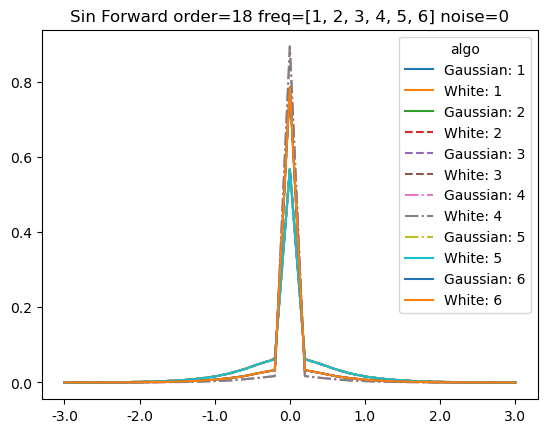

In [25]:
PlotManyFreq(18, 0, 'Sin', 'Forward')

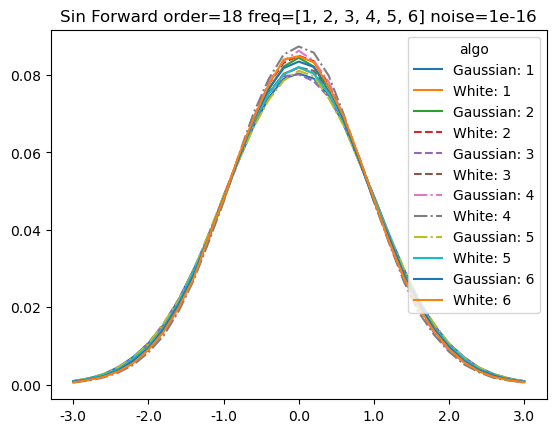

In [26]:
PlotManyFreq(18, 1e-16, 'Sin', 'Forward')

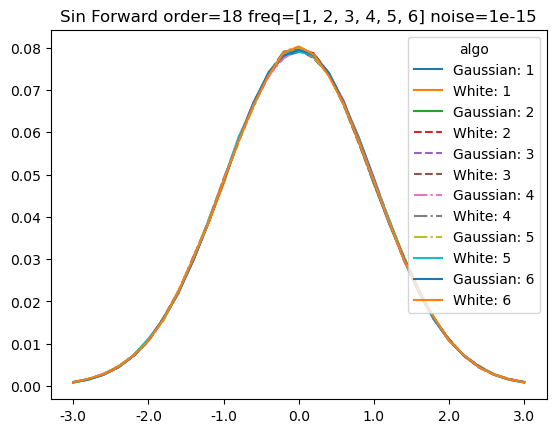

In [27]:
PlotManyFreq(18, 1e-15, 'Sin', 'Forward')

#### Backward

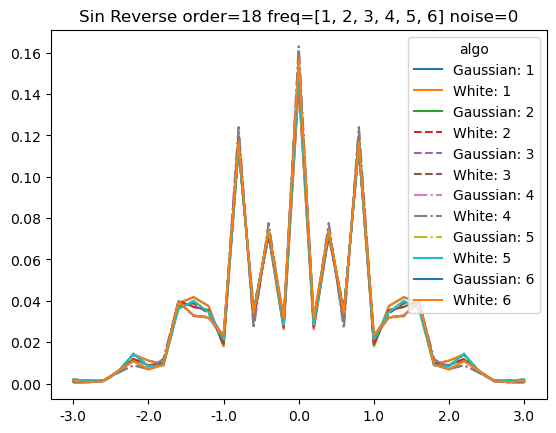

In [28]:
PlotManyFreq(18, 0, 'Sin', 'Reverse')

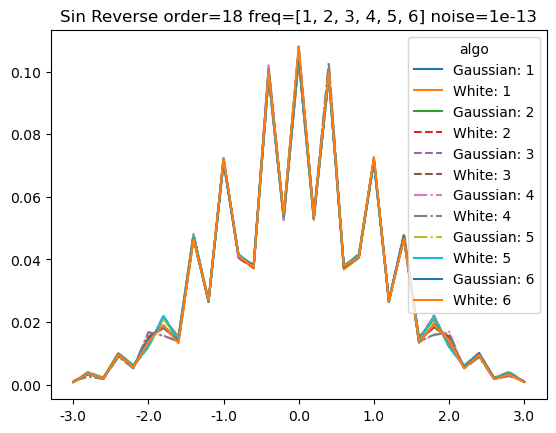

In [29]:
PlotManyFreq(18, 1e-13, 'Sin', 'Reverse')

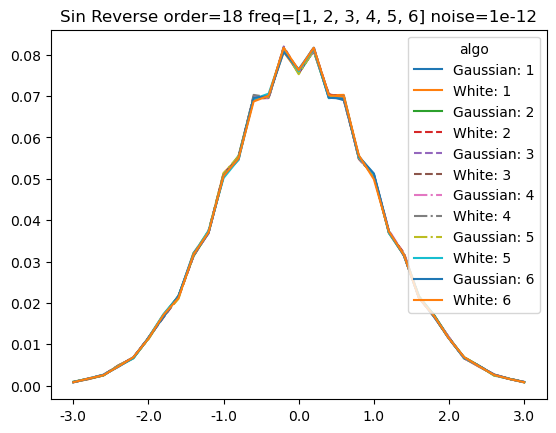

In [30]:
PlotManyFreq(18, 1e-12, 'Sin', 'Reverse')

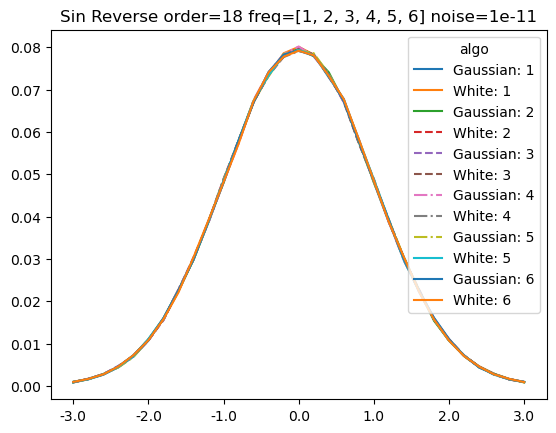

In [31]:
PlotManyFreq(18, 1e-11, 'Sin', 'Reverse')

#### Roundtrip

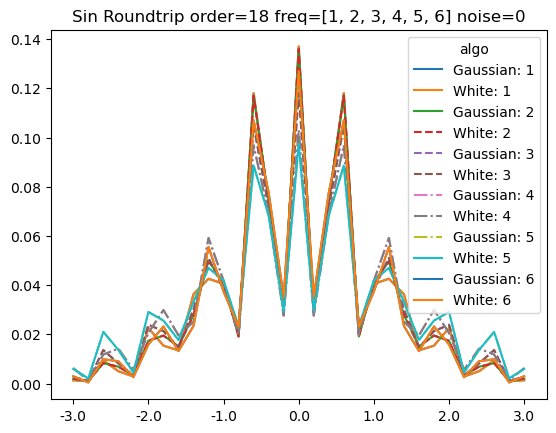

In [32]:
PlotManyFreq(18, 0, 'Sin', 'Roundtrip')

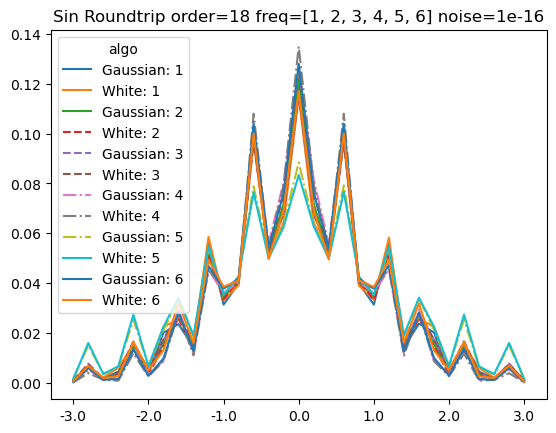

In [33]:
PlotManyFreq(18, 1e-16, 'Sin', 'Roundtrip')

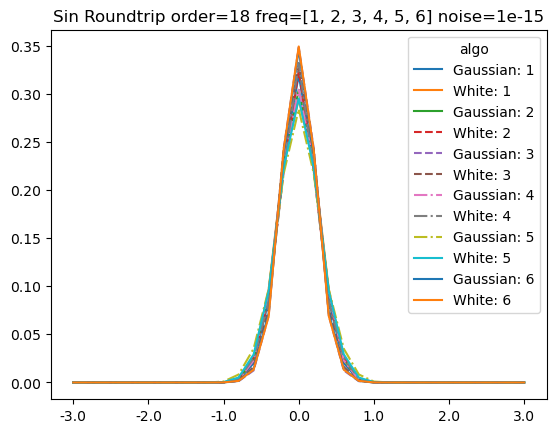

In [34]:
PlotManyFreq(18, 1e-15, 'Sin', 'Roundtrip')

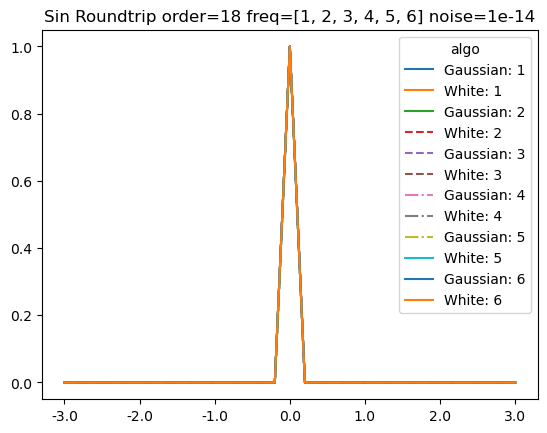

In [35]:
PlotManyFreq(18, 1e-14, 'Sin', 'Roundtrip')

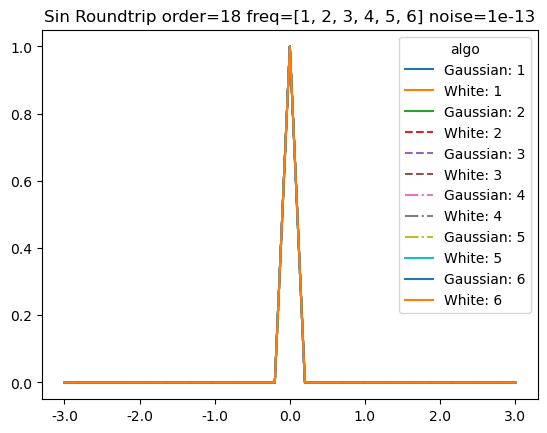

In [36]:
PlotManyFreq(18, 1e-13, 'Sin', 'Roundtrip')

### Sin vs Cos

In [37]:
df['algo'] = df['NoiseType'] + ": "+ df['Signal']
df = df.set_index('algo')

def PlotSinCos(order, noise, freq, test):
    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Freq']== freq) & (df['Test']==test) & 
             (df['Signal'].isin(['Sin', 'Cos']))]
    dfHisto[sHisto].T.plot(style=['-', '-', '-', '--', '--', '--', '-.', '-.', '-.'], logy=True, 
                       title=f'Sin/Cos {test} order={order} freq={freq} noise={noise}')

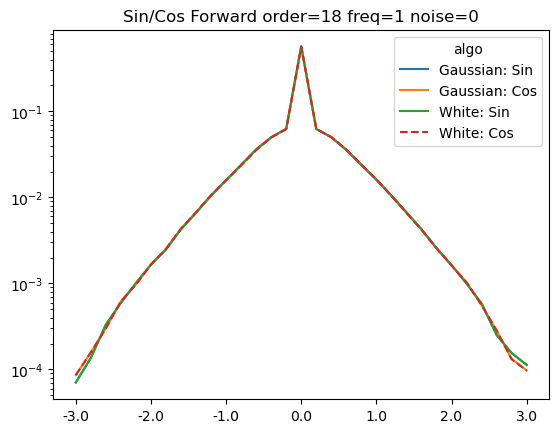

In [38]:
PlotSinCos(18, 0, 1, 'Forward')

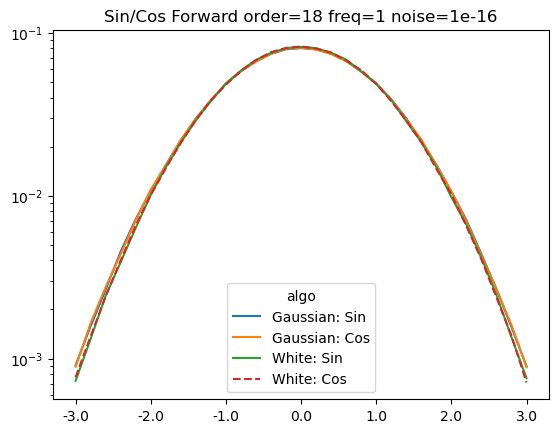

In [39]:
PlotSinCos(18, 1e-16, 1, 'Forward')

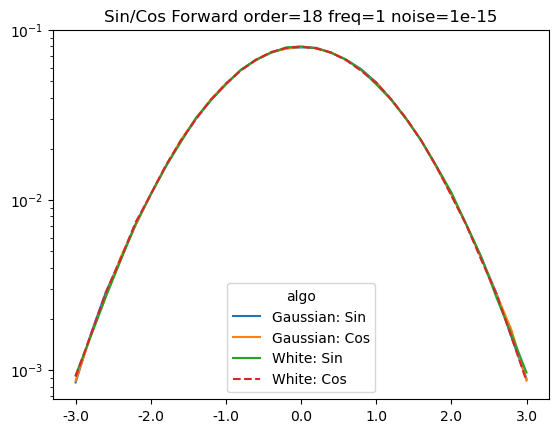

In [40]:
PlotSinCos(18, 1e-15, 1, 'Forward')

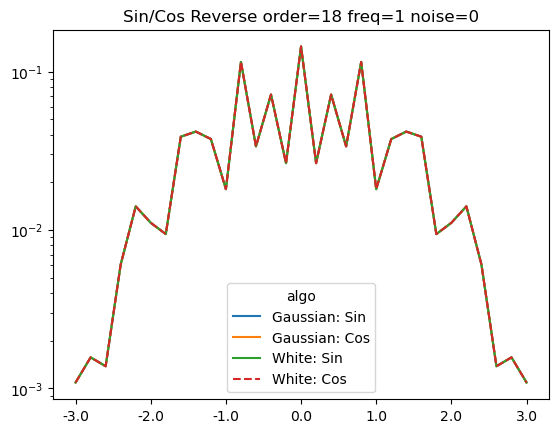

In [41]:
PlotSinCos(18, 0, 1, 'Reverse')

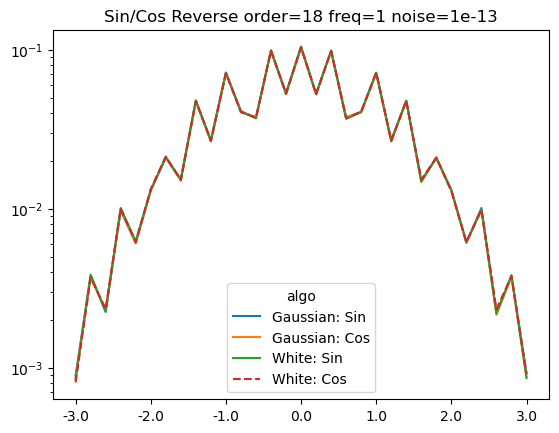

In [42]:
PlotSinCos(18, 1e-13, 1, 'Reverse')

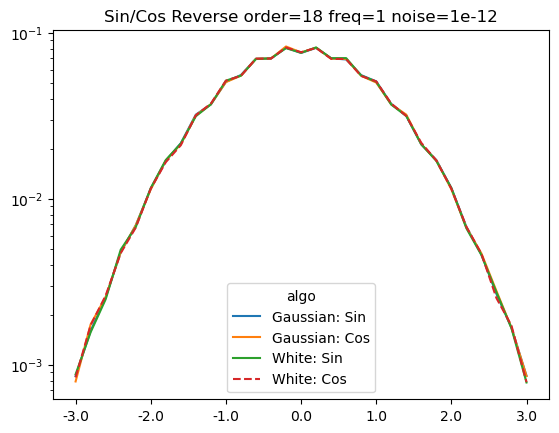

In [43]:
PlotSinCos(18, 1e-12, 1, 'Reverse')

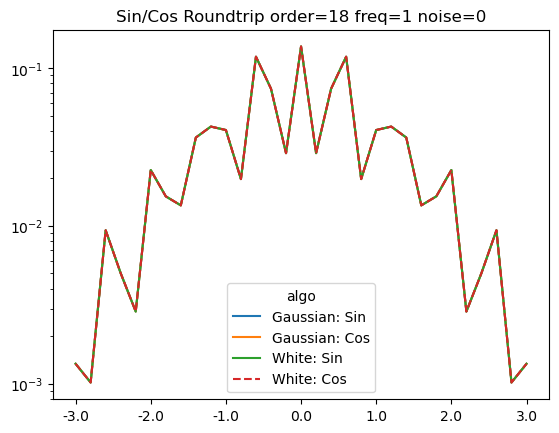

In [44]:
PlotSinCos(18, 0, 1, 'Roundtrip')

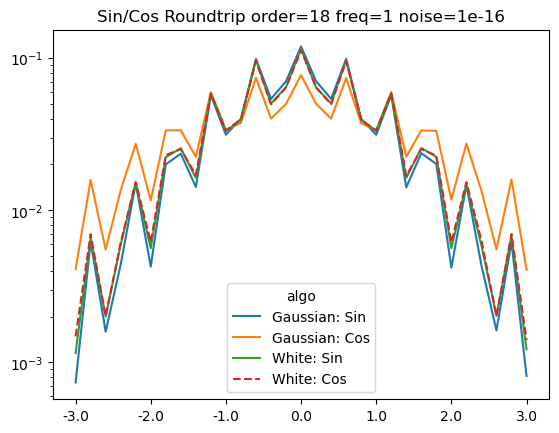

In [45]:
PlotSinCos(18, 1e-16, 1, 'Roundtrip')

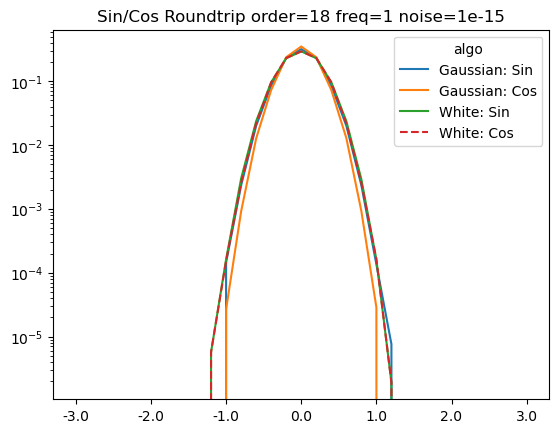

In [46]:
PlotSinCos(18, 1e-15, 1, 'Roundtrip')

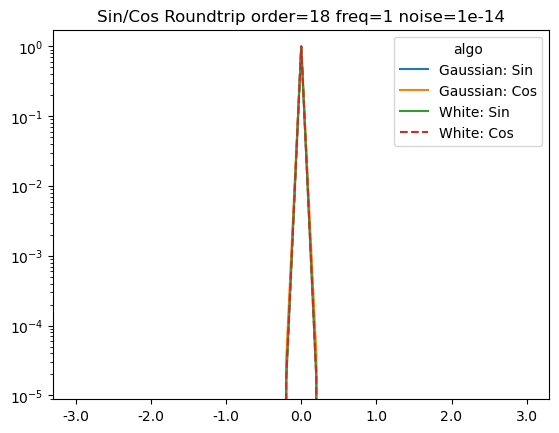

In [47]:
PlotSinCos(18, 1e-14, 1, 'Roundtrip')

### Aggr vs Noise

In [48]:
df['algo'] = df['Test'] + ": " + df['NoiseType']
df = df.set_index('algo')

def PlotHistogram(order, noise, signal, freq=0):
    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Signal']==signal) & (df['Freq']==freq)]
    dfHisto[sHisto].T.plot(style=['-', '-', '-', '--', '--', '--'],
                           title=f'{signal} order={order} noise={noise}')

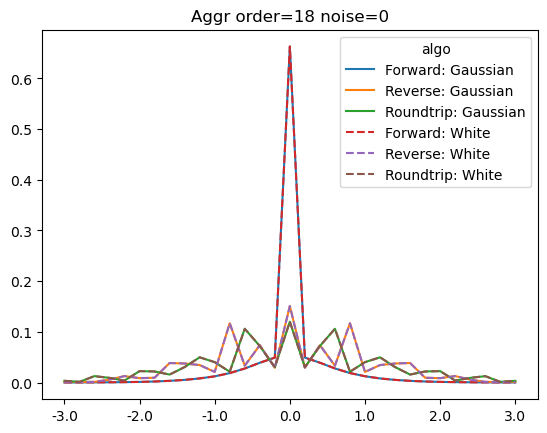

In [49]:
PlotHistogram(18, 0, 'Aggr')

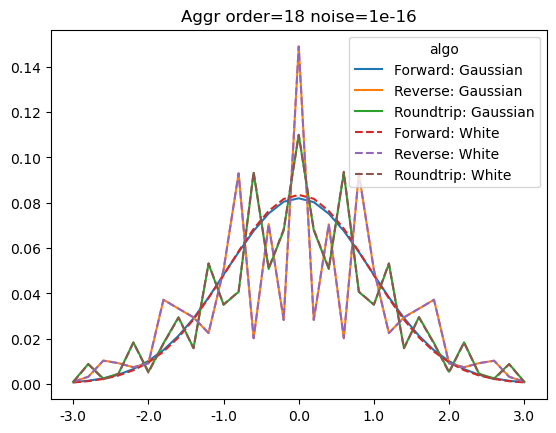

In [50]:
PlotHistogram(18, 1e-16, 'Aggr')

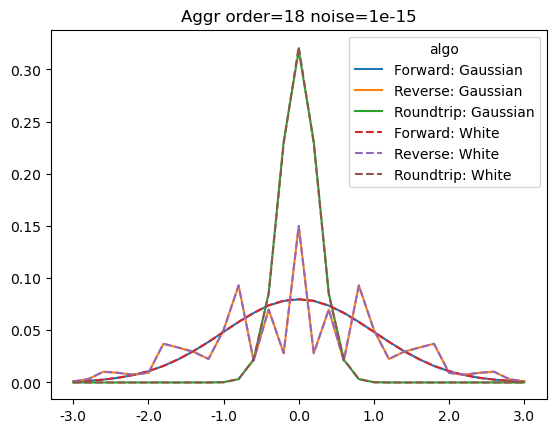

In [51]:
PlotHistogram(18, 1e-15, 'Aggr')

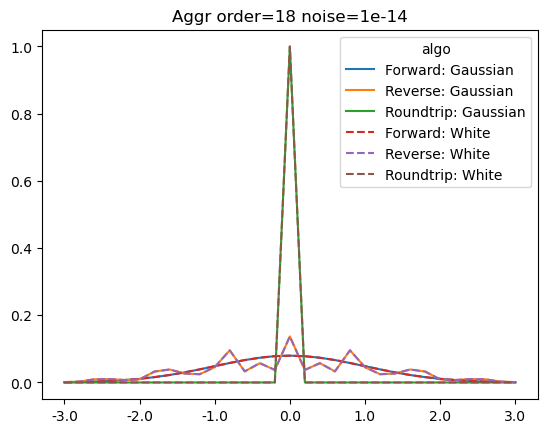

In [52]:
PlotHistogram(18, 1e-14, 'Aggr')

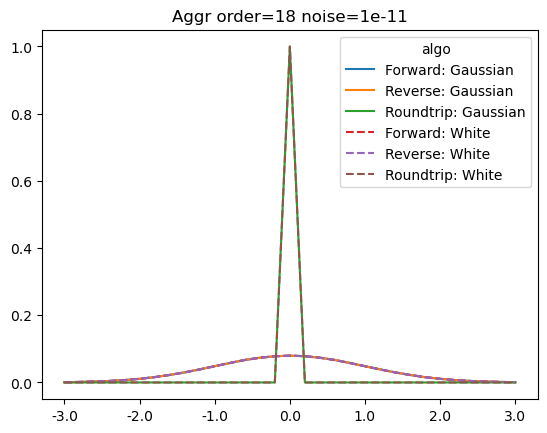

In [53]:
PlotHistogram(18, 1e-11, 'Aggr')

## Slope

In [54]:
# different noise type are similar, but not iddentical
# 1e-3 input uncertainty is needed to get rid of the numerical errors in Aggr

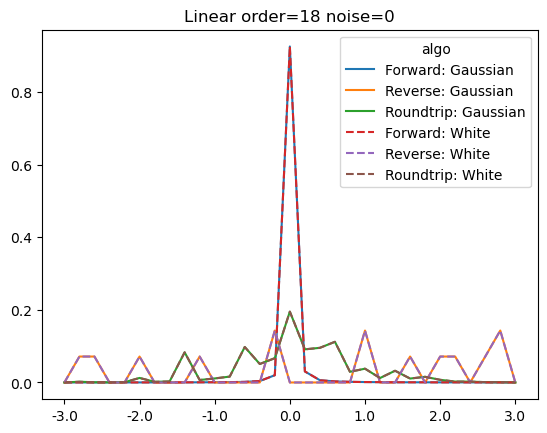

In [55]:
PlotHistogram(18, 0, 'Linear')

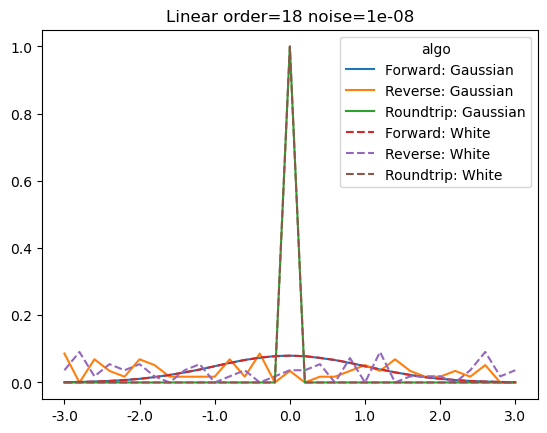

In [56]:
PlotHistogram(18, 1e-8, 'Linear')

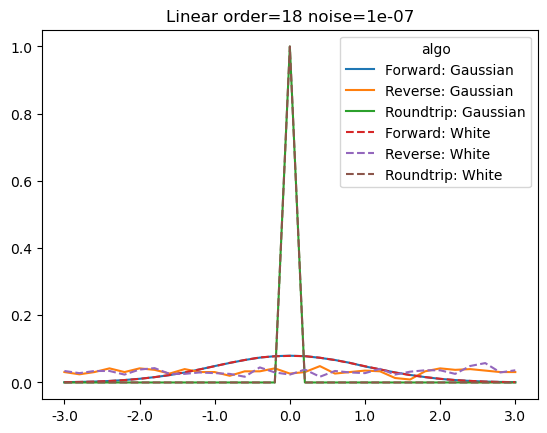

In [57]:
PlotHistogram(18, 1e-7, 'Linear')

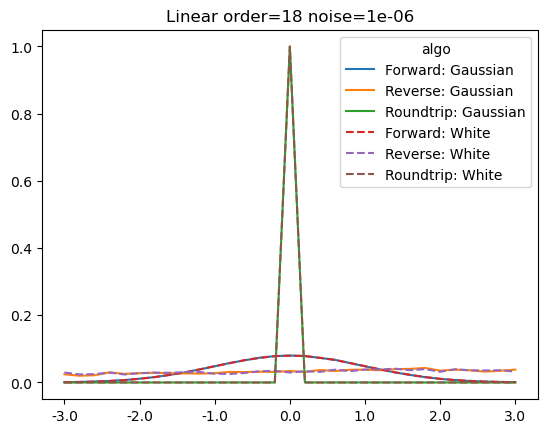

In [58]:
PlotHistogram(18, 1e-6, 'Linear')

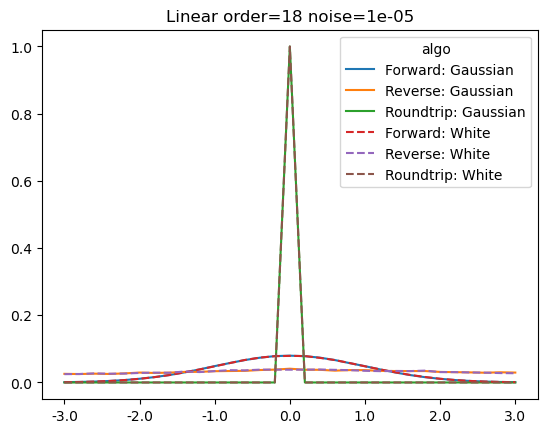

In [59]:
PlotHistogram(18, 1e-5, 'Linear')

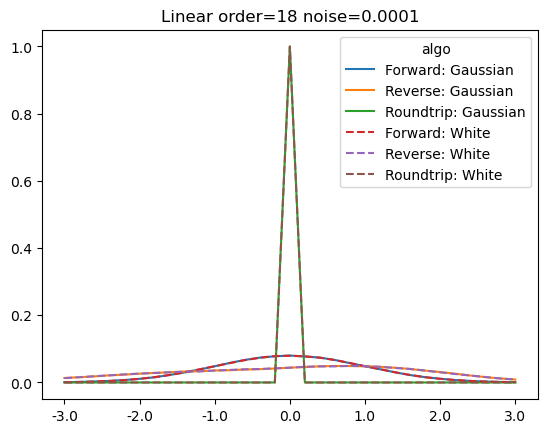

In [60]:
PlotHistogram(18, 1e-4, 'Linear')

In [1]:
PlotHistogram(18, 1e-3, 'Linear')

NameError: name 'PlotHistogram' is not defined

# Plot Order vs Noise

The excel has better 2D plot

## The 2D plot

C:\Users\Cheng\AppData\Local\Temp\ipykernel_27192\2580774853.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


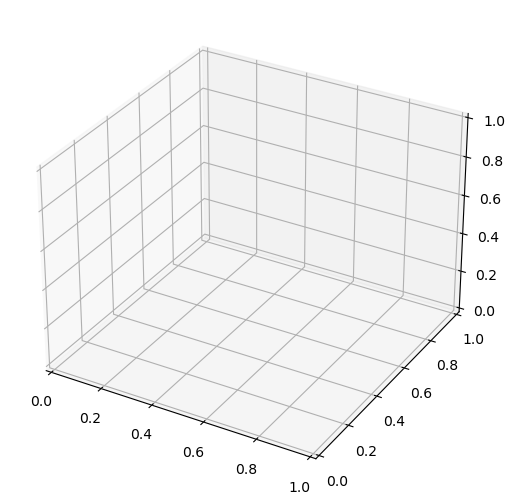

In [62]:
# https://stackoverflow.com/questions/36589521/how-to-surface-plot-3d-plot-from-dataframe
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

In [6]:
signal='Aggr'
freq=0
noiseType='Gaussian'
test='Forward'

In [7]:
import numpy
dfOrderVsNoiseMap = df[(df['Noise']!=0) & (df['Signal']==signal) & (df['Freq']==freq) & (df['NoiseType']==noiseType) & (df['Test']==test)]\
    [['Noise', 'Order', 'UncertaintyMean', 'ErrorDev', 'ErrorMax']]
dfOrderVsNoiseMap['NoiseMagnitude'] = numpy.log10(dfOrderVsNoiseMap['Noise'])
dfOrderVsNoiseMap['UncertaintyMeanMagnitude'] = numpy.log10(dfOrderVsNoiseMap['UncertaintyMean'])
dfOrderVsNoiseMap.head()

Noise  Order  UncertaintyMean  ErrorDev  ErrorMax  \
1737  1.000000e-16      4     4.691000e-16    1.0170     2.915   
1740  1.000000e-15      4     4.009000e-15    0.9708     2.794   
1743  1.000000e-14      4     4.000000e-14    0.9461     2.725   
1746  1.000000e-13      4     4.000000e-13    0.9637     2.445   
1749  1.000000e-12      4     4.000000e-12    0.9232     2.466   

      NoiseMagnitude  UncertaintyMeanMagnitude  
1737           -16.0                -15.328735  
1740           -15.0                -14.396964  
1743           -14.0                -13.397940  
1746           -13.0                -12.397940  
1749           -12.0                -11.397940

<AxesSubplot:xlabel='NoiseMagnitude', ylabel='Order'>

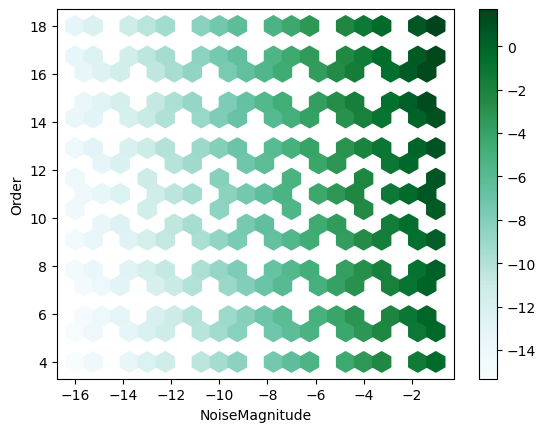

In [8]:
dfOrderVsNoiseMap.plot(kind='hexbin', x='NoiseMagnitude', y='Order', C='UncertaintyMeanMagnitude', gridsize=20)

<AxesSubplot:xlabel='NoiseMagnitude', ylabel='Order'>

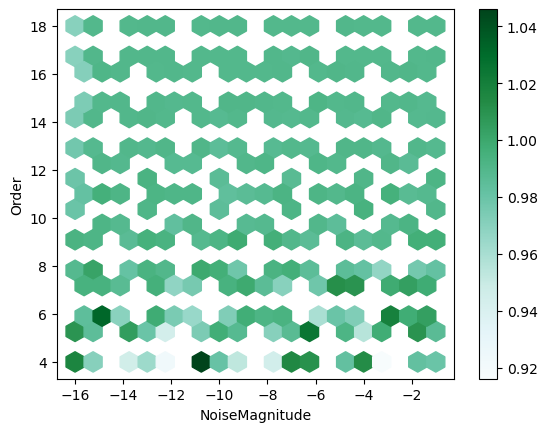

In [9]:
dfOrderVsNoiseMap.plot(kind='hexbin', x='NoiseMagnitude', y='Order', C='ErrorDev', gridsize=20)

In [ ]:
dfOrderVsNoiseMap.plot(kind='hexbin', x='NoiseMagnitude', y='Order', C='ErrorMax', gridsize=20)

# vs Order

In [35]:
def PlotNoise(signal, noise, col):
    df['algo'] = df['Test'] + ' ' + df['NoiseType']
    logy = (col == 'UncertaintyMean')
    dfOrder = df[(df['Signal']==signal) & (df['Noise']==noise)]\
        .sort_values(by=['Test', 'NoiseType', 'Noise']).set_index('Order')
    ax = dfOrder[(dfOrder['NoiseType']=='Gaussian')].groupby(['algo'])[col]\
        .plot(logy=logy, legend=True, title=f'{col} {signal} {noise}')
    dfOrder[(dfOrder['NoiseType']=='White')].groupby(['algo'])[col]\
        .plot(logy=logy, legend=True, linestyle='dotted', sharex=True, sharey=True)
    plt.legend(["Reverse: Gaussian", "Forward: Gaussian", "Roundtrip: Gaussian", 
                "Reverse: White", "Forward: White", "Roundtrip: White"])

In [36]:
def PlotNoNoise(signal, error):
    df['algo'] = df['NoiseType'] + ": "+ df['Test']
    dfOrder = df[(df['Signal']==signal) & (df['Noise']==0) & (df['NoiseType']=='Gaussian')]\
        .sort_values(by=['Test', 'Order']).set_index('Order')
    if error:
        ax = dfOrder.groupby(['algo'])['ErrorDev']\
            .plot(legend=True, title=f'Normalized Error {signal} 0')
        dfOrder.groupby(['algo'])['ErrorMax']\
            .plot(legend=True, linestyle='dotted', sharex=True, sharey=True)
        plt.legend(["Reverse: Dev", "Forward: Dev", "Roundtrip: Dev", 
                    "Reverse: Max", "Forward: Max", "Roundtrip: Max"])
        plt.legend(bbox_to_anchor=(0.6, 0.8))
    else:
        ax = dfOrder.groupby(['algo'])['UncertaintyMean']\
            .plot(logy=True, legend=True, title=f'Uncertainty {signal} 0')
        dfOrder.groupby(['algo'])['UncertaintyDev']\
            .plot(logy=True, legend=True, linestyle='dotted', sharex=True, sharey=True)
        plt.legend(["Reverse: Mean", "Forward: Mean", "Roundtrip: Mean", 
                    "Reverse: Dev", "Forward: Dev", "Roundtrip: Dev"])  
        # plt.legend(bbox_to_anchor=(0.1, 0.9))

## Sin and Cos signals

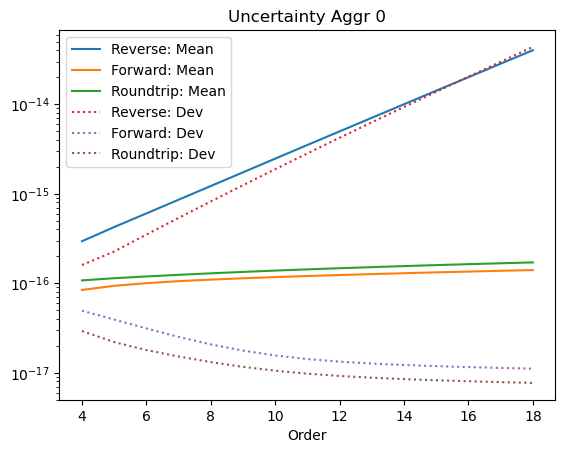

In [37]:
PlotNoNoise('Aggr', False)

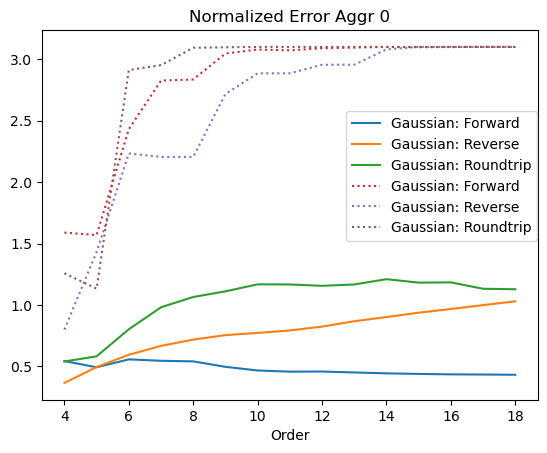

In [38]:
PlotNoNoise('Aggr', True)

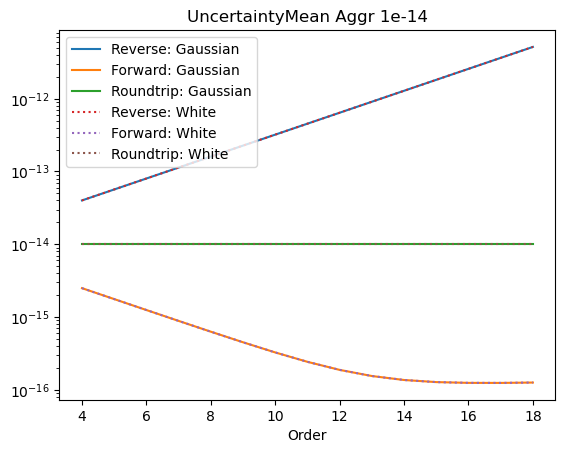

In [39]:
PlotNoise('Aggr', 1e-14, 'UncertaintyMean')

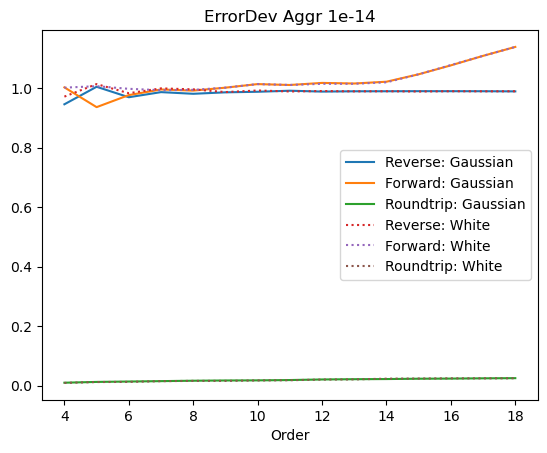

In [40]:
PlotNoise('Aggr', 1e-14, 'ErrorDev')

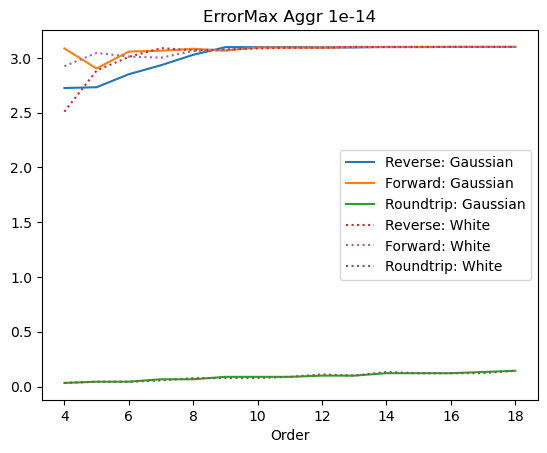

In [41]:
PlotNoise('Aggr', 1e-14, 'ErrorMax')

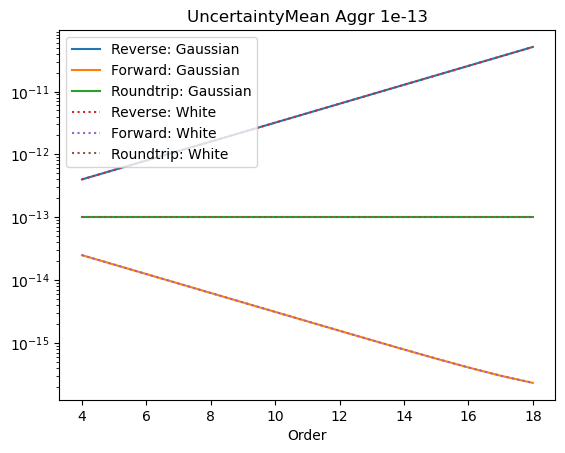

In [42]:
PlotNoise('Aggr', 1e-13, 'UncertaintyMean')

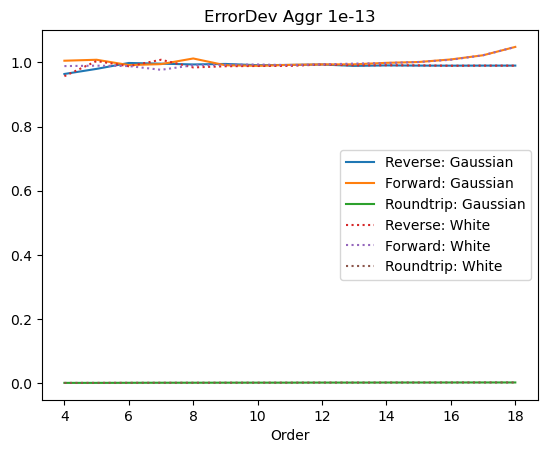

In [43]:
PlotNoise('Aggr', 1e-13, 'ErrorDev')

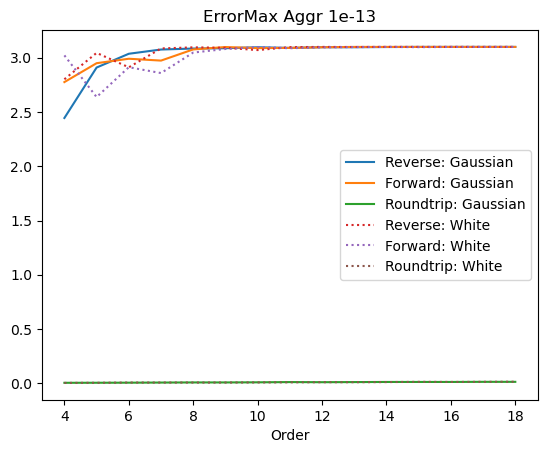

In [44]:
PlotNoise('Aggr', 1e-13, 'ErrorMax')

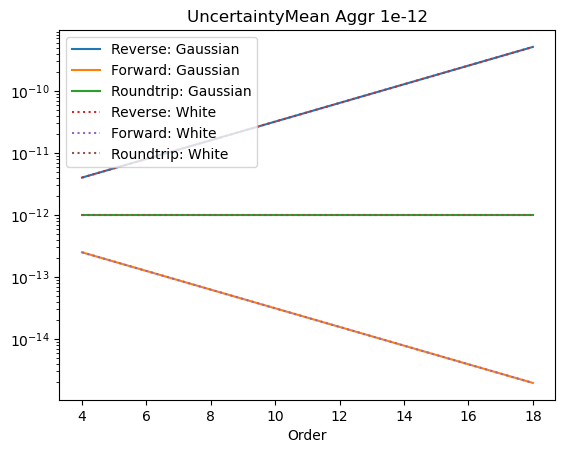

In [45]:
PlotNoise('Aggr', 1e-12, 'UncertaintyMean')

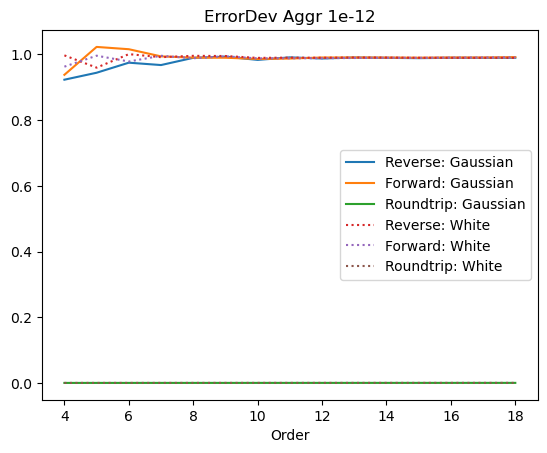

In [46]:
PlotNoise('Aggr', 1e-12, 'ErrorDev')

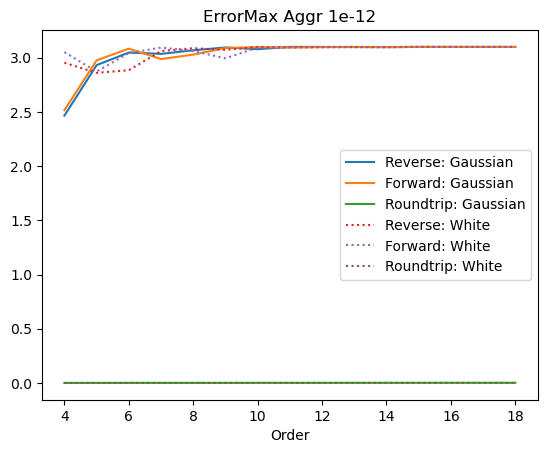

In [47]:
PlotNoise('Aggr', 1e-12, 'ErrorMax')

## Slope

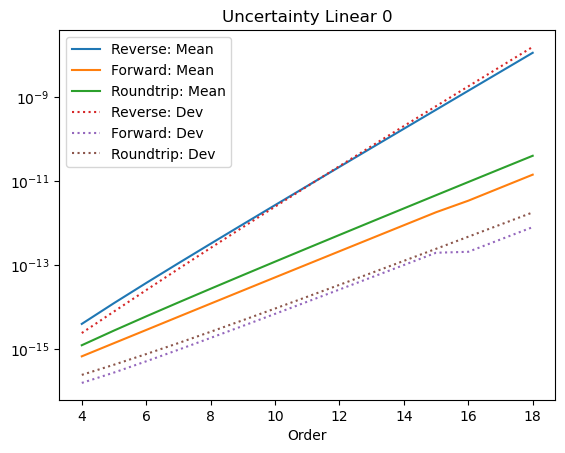

In [48]:
PlotNoNoise('Linear', False)

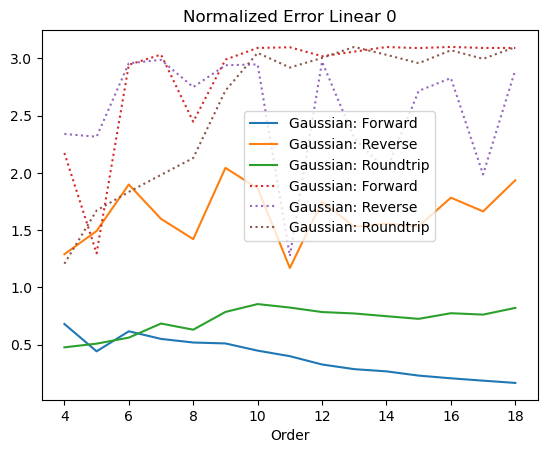

In [49]:
PlotNoNoise('Linear', True)

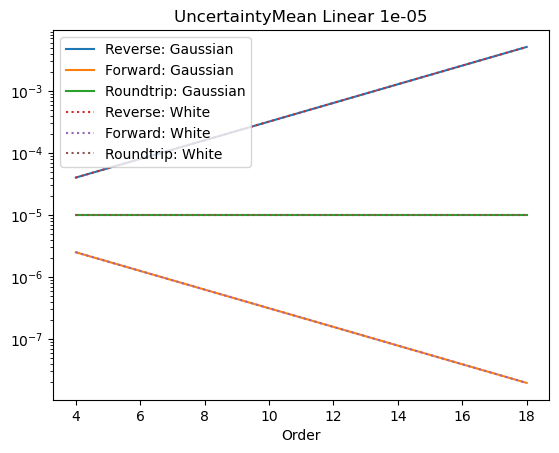

In [50]:
PlotNoise('Linear', 1e-5, 'UncertaintyMean')

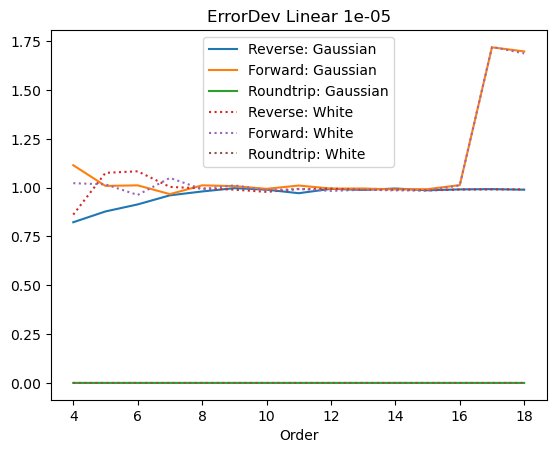

In [51]:
PlotNoise('Linear', 1e-5, 'ErrorDev')

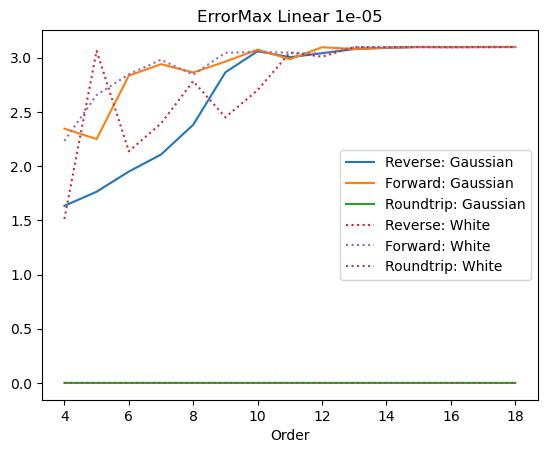

In [52]:
PlotNoise('Linear', 1e-5, 'ErrorMax')

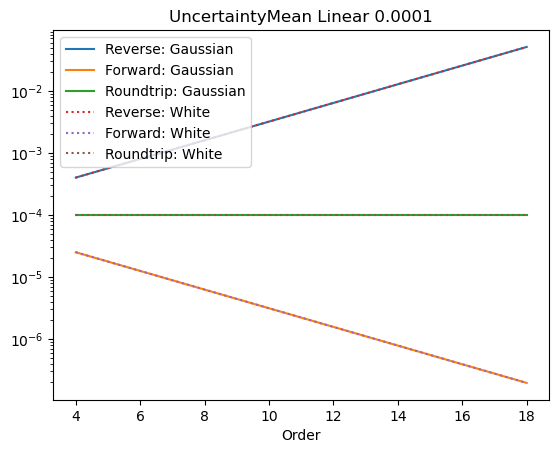

In [53]:
PlotNoise('Linear', 1e-4, 'UncertaintyMean')

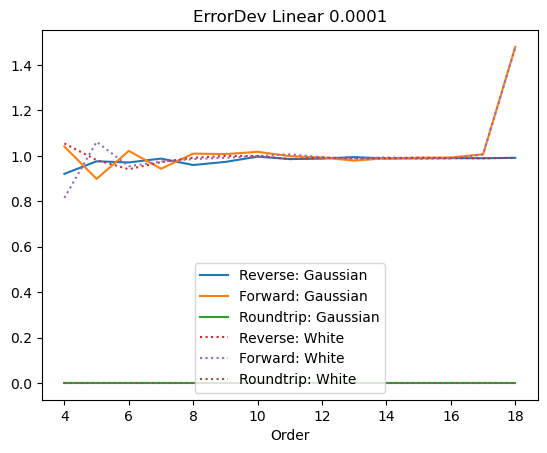

In [54]:
PlotNoise('Linear', 1e-4, 'ErrorDev')

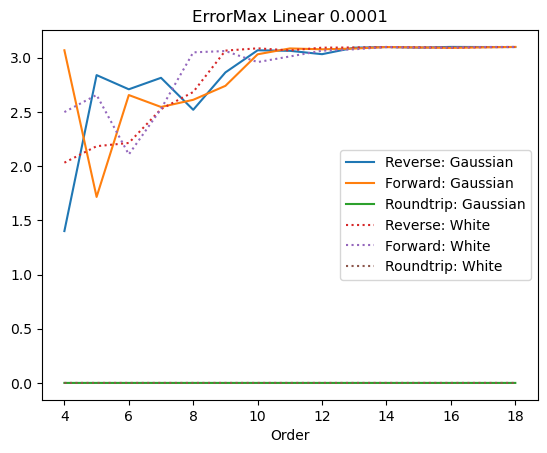

In [55]:
PlotNoise('Linear', 1e-4, 'ErrorMax')

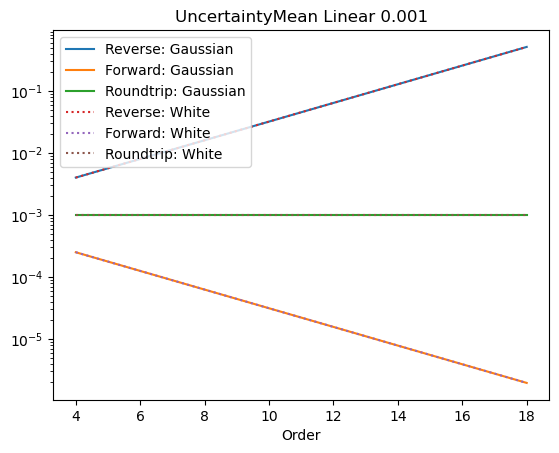

In [56]:
PlotNoise('Linear', 1e-3, 'UncertaintyMean')

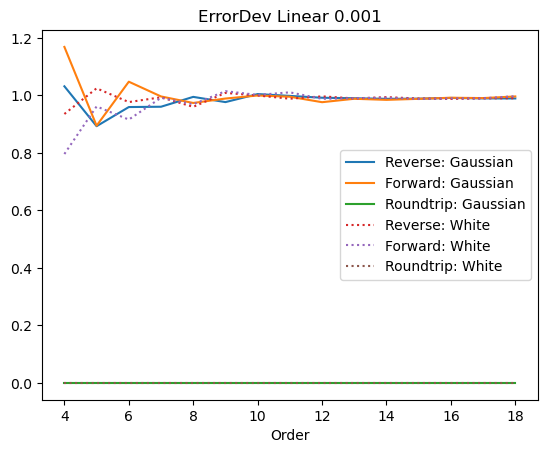

In [57]:
PlotNoise('Linear', 1e-3, 'ErrorDev')

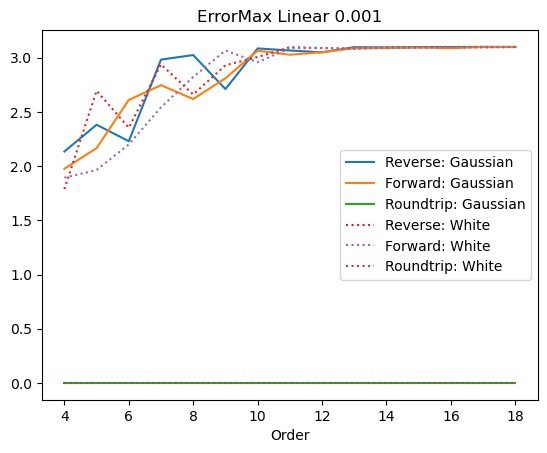

In [58]:
PlotNoise('Linear', 1e-3, 'ErrorMax')

# vs Noise

In [59]:
def PlotOrder(signal, order, col):
    df['algo'] = df['Test'] + ': ' + df['NoiseType']
    logy = (col == 'UncertaintyMean')
    dfNoise = df[(df['Signal']==signal) & (df['Order']==order) & (df['Noise']!=0)]\
        .sort_values(by=['Test', 'NoiseType', 'Noise']).set_index('Noise')
    ax = dfNoise[(dfNoise['NoiseType']=='Gaussian')].groupby(['algo'])[col]\
        .plot(logx=True, logy=logy, legend=True, title=f'{col} {signal} {order}')
    dfNoise[(dfNoise['NoiseType']=='White')].groupby(['algo'])[col]\
        .plot(logx=True, logy=logy, legend=True, linestyle='dotted', sharex=True, sharey=True)
    plt.legend(["Reverse: Gaussian", "Forward: Gaussian", "Roundtrip: Gaussian", 
                "Reverse: White", "Forward: White", "Roundtrip: White"])

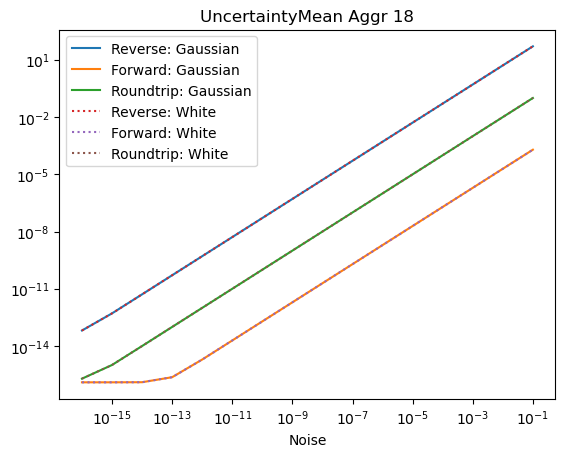

In [60]:
PlotOrder('Aggr', 18, 'UncertaintyMean')

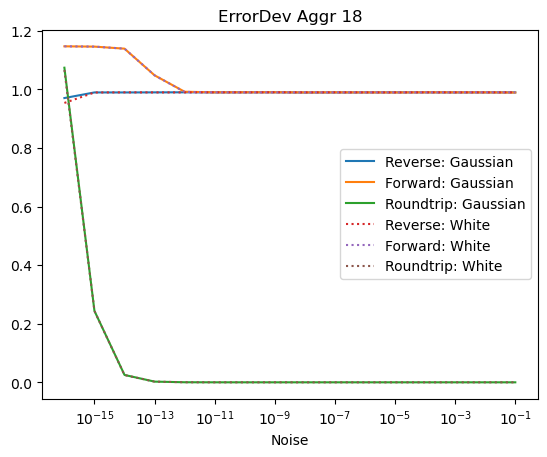

In [61]:
PlotOrder('Aggr', 18, 'ErrorDev')

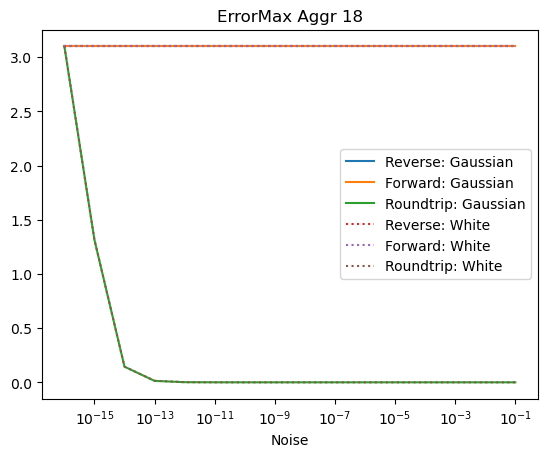

In [62]:
PlotOrder('Aggr', 18, 'ErrorMax')

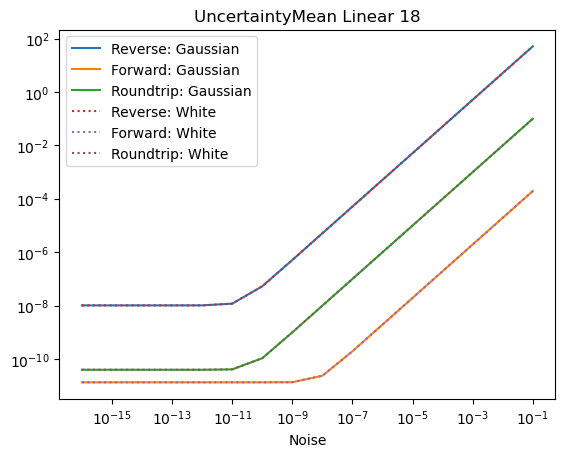

In [63]:
PlotOrder('Linear', 18, 'UncertaintyMean')

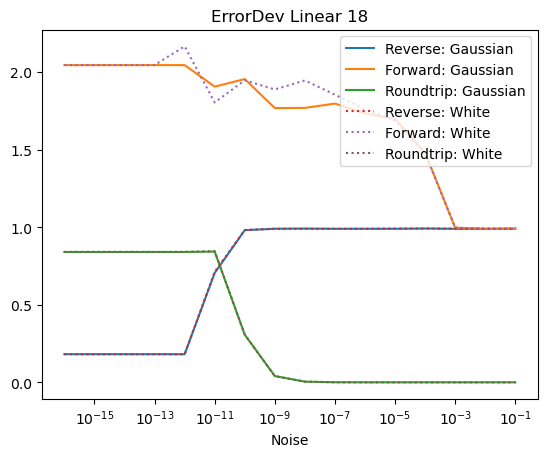

In [64]:
PlotOrder('Linear', 18, 'ErrorDev')

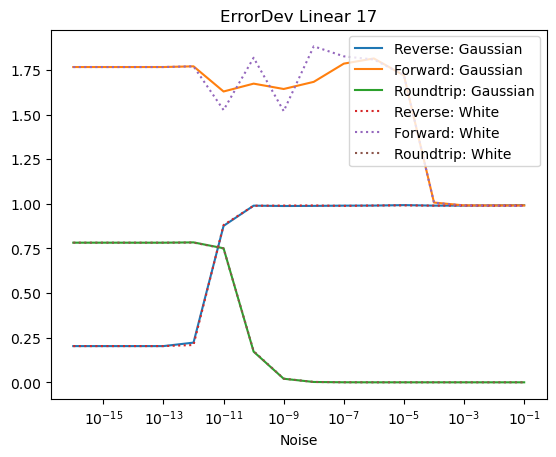

In [65]:
PlotOrder('Linear', 17, 'ErrorDev')

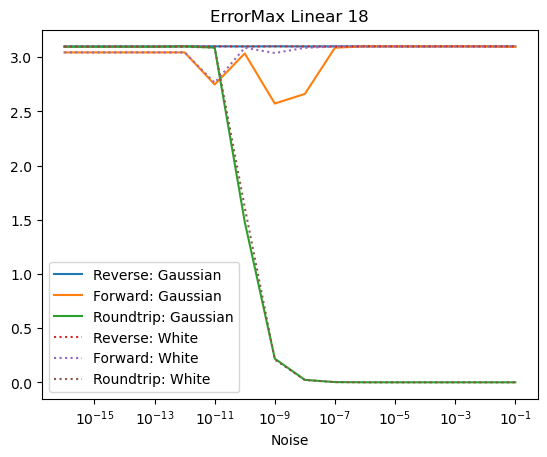

In [66]:
PlotOrder('Linear', 18, 'ErrorMax')